<a href="https://colab.research.google.com/github/Abrx1921/Data-Science-Portfolio/blob/main/Project_6_CNN_Images_V01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 6: Images

Abraham Saenz Sigala

11/12/2025

## V01:

All the images passed through the model



#### Load Necessary Libraries

In [ ]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
import tensorflow.keras as keras
import tensorflow as tf
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten, Conv2D, MaxPooling2D
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
# Reproducible Results
import random
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

## Problem Definition


The goal of this project is to build a deep learning model that can automatically classify images of cats and dogs. Unlike previous projects that used structured CSV data, this task requires working directly with thousands of raw images paired with labels indicating whether each image contains a cat (0) or a dog (1). Because each image includes a known label, this is a supervised learning problem and specifically a binary classification task.

Using these labeled images, the objective is to train a convolutional neural network (CNN) that can learn visual patterns distinguishing cats from dogs. After training, the model will be evaluated on new, unseen images to measure how well it generalizes. This project highlights how deep learning enables computers to recognize complex visual features that traditional machine-learning methods struggled with.

## Data Collection/Sources


#### Data Sources:

The feature set - images of dogs and cats ( mostly ): https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle


the target set - the label (0/1) that something is a dog or cat ( mostly ): https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle


test image: https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg


#### Load in Data

In [ ]:
# Images link
images_url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle"
images_url

'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle'

In [ ]:
# Load in Images Pickle file
image_array = pd.read_pickle( images_url )
type(image_array)

numpy.ndarray

In [ ]:
# Shape of Images
image_array.shape

(24946, 100, 100, 1)

In [ ]:
image_array.size, image_array.min(), image_array.max()

(249460000, np.uint8(0), np.uint8(255))

4D shape = (batch_size, height, width, channels)

- 24946 → number of images

- 100 → image height

- 100 → image width

- 1 → number of channels (grayscale)


In [ ]:
# Target / Label link
labels_url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle"
labels_url

'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle'

In [ ]:
# Load in Target / Label Pickle file
labels = pd.read_pickle( labels_url )
type(labels)

list

In [ ]:
# Shape of Images
pd.DataFrame(labels).shape

(24946, 1)

In [ ]:
# Convert to array
labels = np.array(labels)

24946 total samples in the dataset

#### Full Sample

Although my variable say images_sample and labels_sample. We specified 24946 for so all, I just changed the n =

In [ ]:
# Set the sample size
n = 24946

In [ ]:
# Reproducible
rng = np.random.default_rng(42) # set seed for reproducibility
# Pick the random index for 1000 from the data
rand_sample = rng.choice(len(labels), size = n, replace = False)

In [ ]:
# Set aside the 24946 different samples
images_sample = image_array[rand_sample]
labels_sample = labels[rand_sample]

In [ ]:
pd.DataFrame(labels_sample).value_counts()

,count
0,
1,12476
0,12470


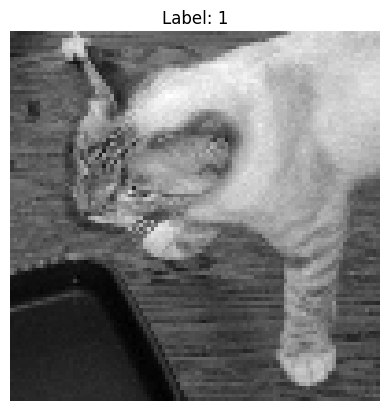

In [ ]:
# Ensure they match
i = 15  # try a few values: 0, 5, 10, etc.
plt.imshow(images_sample[i].squeeze(), cmap="gray")
plt.title(f"Label: {labels_sample[i]}")
plt.axis("off")
# plt.savefig("Cat_label.png")
plt.show()

In [ ]:
for k in [0, 15, 55, 125]:
    idx = rand_sample[k]
    print(
        "Sample position:", k,
        "| Original index:", idx,
        "| labels_sample[k]:", labels_sample[k],
        "| labels[idx]:", labels[idx]
    )

Sample position: 0 | Original index: 12947 | labels_sample[k]: 1 | labels[idx]: 1
Sample position: 15 | Original index: 11416 | labels_sample[k]: 1 | labels[idx]: 1
Sample position: 55 | Original index: 15495 | labels_sample[k]: 1 | labels[idx]: 1
Sample position: 125 | Original index: 16962 | labels_sample[k]: 1 | labels[idx]: 1


How to interpret each part
- Sample position: 0

This means you're checking the 0th item in your image set.

- Original index: 12947

This tells you where this item originally came from in the full dataset.

- labels_sample[k]: 1

This is the label for that item in the sample.

- labels[idx]: 1

This is the label for the same image in the original full labels array.

In [ ]:
print(images_sample.shape[0], labels_sample.shape[0])

24946 24946


Data to work with:

Images = images_sample

Labels = labels_sample

## Data Cleaning


In [ ]:
images_sample[0]

array([[[174],
        [181],
        [193],
        ...,
        [168],
        [205],
        [235]],

       [[252],
        [183],
        [190],
        ...,
        [185],
        [167],
        [172]],

       [[250],
        [250],
        [177],
        ...,
        [180],
        [183],
        [162]],

       ...,

       [[247],
        [252],
        [250],
        ...,
        [211],
        [199],
        [194]],

       [[248],
        [249],
        [250],
        ...,
        [202],
        [209],
        [191]],

       [[183],
        [252],
        [249],
        ...,
        [193],
        [191],
        [208]]], dtype=uint8)

In [ ]:
images_sample.max(), images_sample.min()

(np.uint8(255), np.uint8(0))

In [ ]:
images_sample.size

249460000

In [ ]:
# Normalize the pixel values
images_sample = images_sample / 255.0

In [ ]:
images_sample[0]

array([[[0.68235294],
        [0.70980392],
        [0.75686275],
        ...,
        [0.65882353],
        [0.80392157],
        [0.92156863]],

       [[0.98823529],
        [0.71764706],
        [0.74509804],
        ...,
        [0.7254902 ],
        [0.65490196],
        [0.6745098 ]],

       [[0.98039216],
        [0.98039216],
        [0.69411765],
        ...,
        [0.70588235],
        [0.71764706],
        [0.63529412]],

       ...,

       [[0.96862745],
        [0.98823529],
        [0.98039216],
        ...,
        [0.82745098],
        [0.78039216],
        [0.76078431]],

       [[0.97254902],
        [0.97647059],
        [0.98039216],
        ...,
        [0.79215686],
        [0.81960784],
        [0.74901961]],

       [[0.71764706],
        [0.98823529],
        [0.97647059],
        ...,
        [0.75686275],
        [0.74901961],
        [0.81568627]]])

- Pixel intensities are stored as integers in [0, 255]

- Neural networks train much better when inputs are in [0, 1]

- / 255.0 converts everything to floats and scales them properly

## Exploratory Data Analysis


In [ ]:
# Explore shape of images and labels
images_sample.shape, labels.shape

((24946, 100, 100, 1), (24946,))

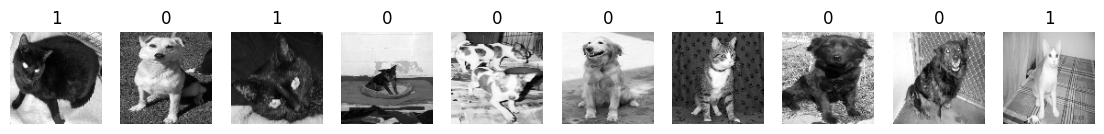

In [ ]:
# Plot some images (first 5)

plt.figure(figsize=(14, 12))

for i in range(10):
  plt.subplot(1, 10, i + 1)
  img = images_sample[i].squeeze()
  plt.imshow(img, cmap = 'gray')
  plt.title(labels_sample[i])
  plt.axis("off")


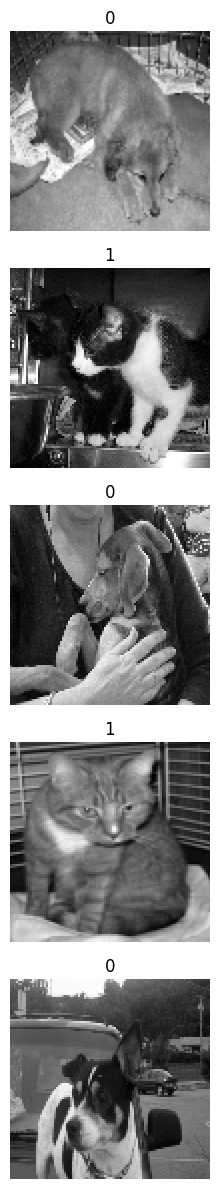

In [ ]:
# Plot a range
start = 50   # <-- change this
end = 55     # <-- change this (non-inclusive, like Python slicing)

plt.figure(figsize=(4, 12))

for i in range(start, end):
    plt.subplot(end - start, 1, i - start + 1)
    # end - start = how many rows, 1 = one column, i - start + 1 = which row to place each image in
    img = images_sample[i].squeeze()
    label = labels_sample[i]
    plt.imshow(img, cmap="gray")
    plt.title(labels_sample[i])
    plt.axis("off")

plt.tight_layout()



## Processing



#### Test / Train Split

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images_sample, labels_sample, test_size = .20, random_state = 42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape
# (200, 100, 100, 1) (Image, Row, Columns, Channel)

((19956, 100, 100, 1), (19956,), (4990, 100, 100, 1), (4990,))

24,946 total

19,956 train

4,990 test

Matches correctly

#### Input layer

In [ ]:
# Create a Sequential model (layers added one after another)
cnn = Sequential()

In [ ]:
# Define input layer
# Add the input layer: tells the CNN the shape of each image (H, W, Channels)
cnn.add(
  Input(
    shape=X_train.shape[1:],
    name="images_input",
  ),
)

#### Hidden Layers

In [ ]:
# Define first hidden layer
cnn.add(
  Conv2D(
    name = "Conv1",
    filters = 64, # number of pattern detectors the CNN will learn
    kernel_size = (3,3), # size of the sliding window (3x3) used to scan the image
    activation = 'relu',
  )
)

cnn.add(
    MaxPooling2D(pool_size=(2,2)) # downsamples the feature map (keeps strongest features, reduces size)
)

In [ ]:
# Define second hidden layer
cnn.add(
  Conv2D(
    name = "Conv2",
    filters = 64,
    kernel_size = (3,3),
    activation = 'relu',
  )
)

cnn.add(
  MaxPooling2D(pool_size=(2,2))
)

- Pooling shrinks the feature map

- But keeps the strongest/most important values

#### Output Layer

In [ ]:
# Create a dense layer

# Flatten data to be used in output layer
cnn.add(
    Flatten()
)

# Define output layer
cnn.add(
  Dense(
    name = "output",
    units = 1, # P(cat) since cat = 1
    activation = 'sigmoid', # Sigmoid makes this a binary classifier.
  )
)

Flatten

- Converts the 3D feature maps into a 1D vector.

- Necessary because Dense layers require 1D input.

Dense Output Layer

- Final classification layer.

- Uses softmax activation to output probabilities for each class.

- units = 10 means 10 possible categories.

Binary Output Layer (Dense(1, sigmoid))

- Outputs one probability value between 0 and 1.

- This value represents P(class = 1) (probability the image is a cat).

- If output ≥ 0.5 → predicted cat (1).

- If output < 0.5 → predicted dog (0).

- Sigmoid activation ensures the output is always in the [0, 1] range.

#### Compile the Model

In [ ]:
# Compile model
cnn.compile(
  optimizer = 'adam',
  loss = 'binary_crossentropy',
  metrics = ['accuracy'],
)

**Loss Functions (When to use which)**

binary_crossentropy

- Use for binary classification (0/1).

- Example: cat vs dog.

categorical_crossentropy

- Use for 3+ classes with one-hot labels.

- Example: cat, dog, horse (labels like [1,0,0]).

sparse_categorical_crossentropy

- Use for 3+ classes with integer labels.

- Example: 0=cat, 1=dog, 2=horse.

mse (mean squared error)

- Use for regression (predicting numbers).

- Not for classification.

**Optimizers (Simple summary)**

adam

- Best default choice.

- Fast learning, works well in most cases.

sgd

- Slower but stable.

- Use when you want more controlled learning.

rmsprop
- Good for RNNs or sequence data.
- Often used in text/time series.

**Metrics (When to use)**

accuracy
- Use for classification when classes are balanced.

precision
- Use when false positives are costly
(e.g., predicting disease when someone is healthy).

recall
- Use when false negatives are costly
(e.g., missing a disease case).

mae / mse
- Use for regression (predicting continuous numbers).

#### Fit the Model

In [ ]:
# Fit the model (default batch size = 32)
cnn.fit(X_train, y_train, epochs = 15)

Epoch 1/15
624/624 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.6275 - loss: 0.6304
Epoch 2/15
624/624 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.7598 - loss: 0.5003
Epoch 3/15
624/624 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7952 - loss: 0.4456
Epoch 4/15
624/624 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8192 - loss: 0.4017
Epoch 5/15
624/624 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8416 - loss: 0.3614
Epoch 6/15
624/624 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8615 - loss: 0.3227
Epoch 7/15
624/624 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8807 - loss: 0.2866
Epoch 8/15
624/624 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8982 - loss: 0.2510
Epoch 9/15
624/624 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9130 - loss: 0.2197
Epoch 10/15
624/624 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9269 - loss: 0.1929
Epoch 11/15
624/624 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9338 - loss: 0.1725
Epoch 12/15
624/624 ━━━━━━━━━━━━━━━━━━━

In [ ]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                  │ (None, 98, 98, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 47, 47, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │        33,857 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 214,277 (837.02 KB)

 Trainable params: 71,425 (279.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 142,852 (558.02 KB)

In [ ]:
cnn.input_shape

(None, 100, 100, 1)

#### Evaluate the Model

In [ ]:
# Classifiaction Report for other versions
from sklearn.metrics import classification_report

In [ ]:
# Evaluate model
val_loss, val_acc = cnn.evaluate(X_test, y_test)
print(val_loss)
print(val_acc)

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7551 - loss: 0.8661
0.8379284739494324
0.755310595035553


Good model performance. It is performing good on the test set based on the evaluation.

#### Use model for predictions

In [ ]:
# Make predictions based on testing set
predictions = cnn.predict(X_test)

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [ ]:
# Probabilities / %
print(predictions[:5])

[[0.15148516]
 [0.99978185]
 [0.33401006]
 [0.9394423 ]
 [0.9970162 ]]


In [ ]:
predictions.shape

(4990, 1)

In [ ]:
# Actual class labels
pred_classes = (predictions > 0.5).astype("int32")
print(pred_classes[:5])

[[0]
 [1]
 [0]
 [1]
 [1]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
probability: (< .5 = Dog, > .5 = Cat) [[0.9998151]]
class: (0 = Dog, 1 = Cat) 1


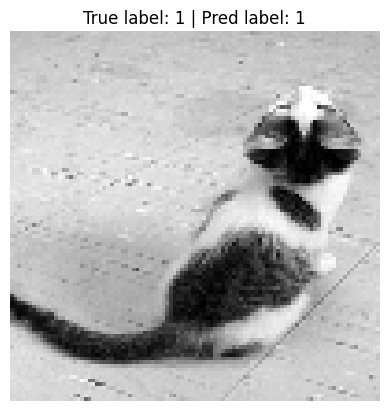

In [ ]:
# Predict one single image
i = 148

img = X_test[i].reshape(1, 100, 100, 1)   # example shape
prob = cnn.predict(img)
label = (prob > 0.5).astype("int32").item()

print("probability: (< .5 = Dog, > .5 = Cat)", prob)
print("class: (0 = Dog, 1 = Cat)", label)

plt.imshow(X_test[i].squeeze(), cmap='gray')
plt.title(f"True label: {y_test[i]} | Pred label: {label}")
plt.axis('off')
plt.show()

#### Distribution of Probablilites

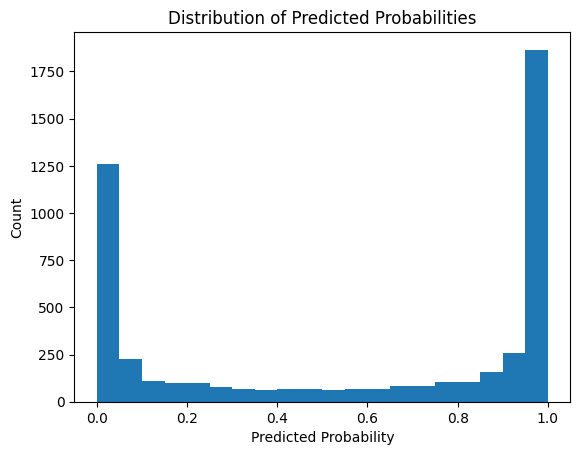

In [ ]:
plt.hist(predictions, bins = 20)
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.title("Distribution of Predicted Probabilities")
# plt.savefig("Distribution of Predicted Probabilities.png")
plt.show()

For the probabilites of our testing set. We see that there we many more predictions that the pet was going to be a cat/1 rather than a dog/0. From the probabilities in the middle we see and even chance it can be either, but more instances where our model believed that it was almost absolutely certain it was a dog or a cat.

## Test Image

Source: https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg

In [ ]:
test_img = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg'

In [ ]:
test_img

'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg'

In [ ]:
from PIL import Image
import requests
from io import BytesIO

def prepare_image_url(url): # Function that will load a png
    # load image from URL
    response = requests.get(url) # downloads image
    img = Image.open(BytesIO(response.content)).convert("L")  # loads img/bytes into file like/grayscale
    img = img.resize((100, 100)) # resize (100x100) image
    img = np.array(img) / 255.0 # normalize output
    return img.reshape(1, 100, 100, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
probability: (< .5 = Dog, > .5 = Cat) [[0.0458731]]
class: (0 = Dog, 1 = Cat) [[0]]


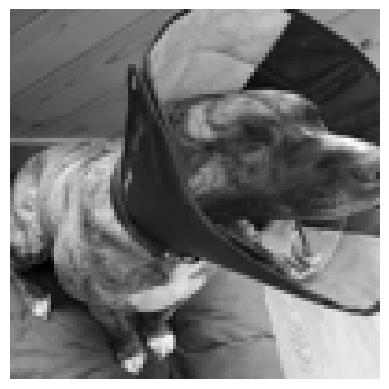

In [ ]:
# Test img prediction
img = prepare_image_url(test_img)
prob = cnn.predict(img)
label = (prob > 0.5).astype("int32")

print("probability: (< .5 = Dog, > .5 = Cat)", prob)
print("class: (0 = Dog, 1 = Cat)", label)

plt.imshow(img.squeeze(), cmap='gray')
plt.axis('off')
plt.show()

## Bonus: NOTE MAKE SURE YOU DOWNLOAD THE IMAGE AND RUN THE CODE BELOW SO NOTEBOOK RUNS TO COMPLETION

Testing the model on a picture of T Bone.

Source: https://drive.google.com/file/d/1TQfNYyGHijEnGT9ditGfdrvamET5BbLN/view?usp=drive_link



Copy + Paste Code Cell Below to see how well the model predicts my dog T Bone!

```
# Download image from link above and upload to colab
from google.colab import files
uploaded = files.upload()

t_bone_img = "T_Bone_Image.jpg"
print(t_bone_img)

print(img.shape)

print(img.min(), img.max())

def prepare_uploaded_image(filename):
    img = Image.open(filename).convert("L")  # grayscale
    img = img.resize((100, 100))            # model expects 100x100
    img = np.array(img) / 255.0             # normalize
    return img.reshape(1, 100, 100, 1)      # batch, H, W, C

filename = "T_Bone_Image.jpg"

img = prepare_uploaded_image(filename)   # re-create img correctly

print(img.shape)         # should be (1, 100, 100, 1)
print(img[0].shape)      # should be (100, 100, 1)

prob = cnn.predict(img)
label = (prob > 0.5).astype("int32")

print("probability: (< .5 = Dog, > .5 = Cat)", prob)
print("class: (0 = Dog, 1 = Cat)", label)

plt.imshow(img[0].squeeze(), cmap='gray')
plt.axis('off')
plt.show()




## Data Visualization/Communication of Results


For this project, I built a convolutional neural network to classify grayscale images of cats and dogs. The dataset contained 24,946 labeled images, and the model was trained using Adam as the optimizer, binary cross-entropy as the loss function, and accuracy as the main evaluation metric.

After training for 15 epochs with a batch size of 32, the model reached 94% accuracy and a 0.14 loss on the training set. On the test set, the performance dropped to 74% accuracy with a 0.83 loss. This gap between training and test results shows clear overfitting, meaning the model learned the training images very well but did not generalize as effectively to new, unseen images.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
probability: (< .5 = Dog, > .5 = Cat) [[0.0458731]]
class: (0 = Dog, 1 = Cat) [[0]]


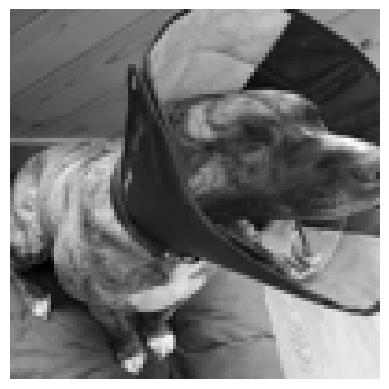

In [ ]:
# Test img prediction
img = prepare_image_url(test_img)
prob = cnn.predict(img)
label = (prob > 0.5).astype("int32")

print("probability: (< .5 = Dog, > .5 = Cat)", prob)
print("class: (0 = Dog, 1 = Cat)", label)

plt.imshow(img.squeeze(), cmap='gray')
plt.axis('off')
plt.show()

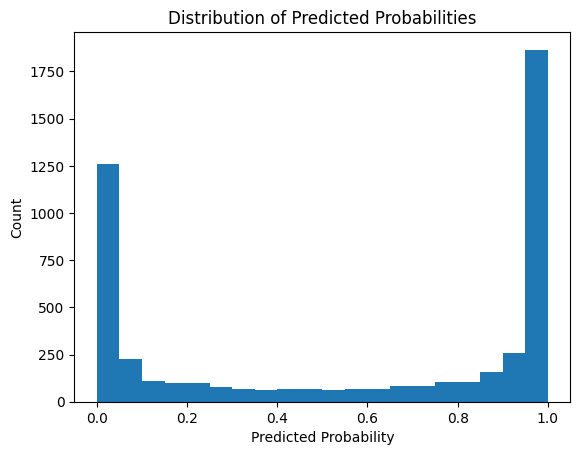

In [ ]:
plt.hist(predictions, bins = 20)
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.title("Distribution of Predicted Probabilities")
# plt.savefig("Distribution of Predicted Probabilities.png")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
probability: (< .5 = Dog, > .5 = Cat) [[0.9998151]]
class: (0 = Dog, 1 = Cat) 1


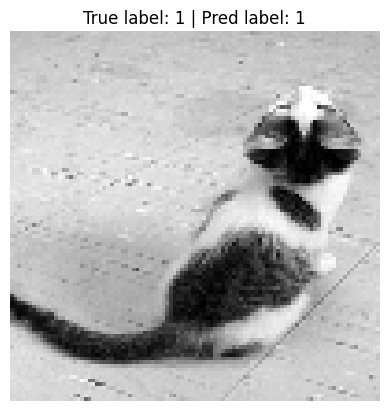

In [ ]:
# Predict one single image
i = 148

img = X_test[i].reshape(1, 100, 100, 1)   # example shape
prob = cnn.predict(img)
label = (prob > 0.5).astype("int32").item()

print("probability: (< .5 = Dog, > .5 = Cat)", prob)
print("class: (0 = Dog, 1 = Cat)", label)

plt.imshow(X_test[i].squeeze(), cmap='gray')
plt.title(f"True label: {y_test[i]} | Pred label: {label}")
plt.axis('off')
plt.show()

In [ ]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                  │ (None, 98, 98, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 47, 47, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │        33,857 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 214,277 (837.02 KB)

 Trainable params: 71,425 (279.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 142,852 (558.02 KB)

The summary shows each layer of my CNN, its output shape, and how many parameters it learns. The model has two convolution layers for feature learning, pooling layers to reduce image size, a flatten layer to convert the data into a vector, and a final dense layer for binary classification. In total, the model learns about 214,000 parameters.

**Total parameters**

214,277 parameters total
(this is how many values the model learns)

Trainable params: 71,425

These are the weights learned directly from data.

Optimizer params: 142,852

Adam keeps internal values (like momentum terms), which add to the parameter count but aren’t weights of the model.


Next Steps:

1. Add Dropout

Helps reduce overfitting by randomly turning off neurons during training.

2. Add Data Augmentation

Create variations of images (rotate, flip, zoom) so the model learns more general features.

3. Add More Convolution Layers

Deeper networks often capture better features.

4. Use Early Stopping

Stop training when validation loss stops improving to prevent overfitting.

5. Use Batch Normalization

Helps stabilize training and improve generalization.

What is Batch Normalization (simple)

Batch Normalization stabilizes training by normalizing the outputs of a layer.

Simple explanation:

After a Conv or Dense layer, the activations might get too large or too small.

BatchNorm rescales them back to a stable range.

This makes learning faster and often reduces overfitting.

6. Use a Pretrained Model (Transfer Learning)

Models like VGG16 or MobileNet can massively boost accuracy with less training.

7. Tune Hyperparameters

Adjust:

learning rate

- The learning rate controls how big the weight updates are:

  -Common learning rate options:

    - 0.001 (default)

    - 0.0005 (safer)

    - 0.0001 (very stable, slower)

    - 0.01 (too big for CNNs, usually bad)

batch size

number of epochs

8. Balance the classes if needed

If cats/dogs are imbalanced, fix it.
